# 项目：用逻辑回归预测泰坦尼克号幸存情况

## 分析目标

此数据分析报告的目的是，基于泰坦尼克号乘客的性别和船舱等级等属性，对幸存情况进行逻辑回归分析，从而能利用得到的模型，对未知幸存情况的乘客，根据属性预测是否从沉船事件中幸存。

## 简介

> 泰坦尼克号（英语：RMS Titanic）是一艘奥林匹克级邮轮，于1912年4月首航时撞上冰山后沉没。泰坦尼克号是同级的3艘超级邮轮中的第2艘，与姐妹船奥林匹克号和不列颠号为白星航运公司的乘客们提供大西洋旅行。

> 泰坦尼克号由位于北爱尔兰贝尔法斯特的哈兰·沃尔夫船厂兴建，是当时最大的客运轮船，由于其规模相当一艘现代航空母舰，因而号称“上帝也沉没不了的巨型邮轮”。在泰坦尼克号的首航中，从英国南安普敦出发，途经法国瑟堡-奥克特维尔以及爱尔兰昆士敦，计划横渡大西洋前往美国纽约市。但因为人为错误，于1912年4月14日船上时间夜里11点40分撞上冰山；2小时40分钟后，即4月15日凌晨02点20分，船裂成两半后沉入大西洋，死亡人数超越1500人，堪称20世纪最大的海难事件，同时也是最广为人知的海难之一。

数据集包括两个数据表：`titianic_train.csv`和`titanic_test.csv`。

`titianic_train.csv`记录了超过八百位泰坦尼克号乘客在沉船事件后的幸存情况，以及乘客的相关信息，包括所在船舱等级、性别、年龄、同乘伴侣/同胞数量、同乘父母/孩子数量，等等。

`titanic_test.csv`只包含乘客（这些乘客不在`titianic_train.csv`里）相关信息，此文件可以被用于预测乘客是否幸存。

`titianic_train.csv`每列的含义如下：
- PassengerId：乘客ID
- survival：是否幸存
   - 0	否
   - 1	是
- pclass：船舱等级
   - 1	一等舱
   - 2	二等舱
   - 3  三等舱
- sex：性别
- Age：年龄
- sibsp：同乘伴侣/同胞数量
- parch：同乘父母/孩子数量
- ticket：船票号
- fare：票价金额
- cabin：船舱号
- embarked：登船港口
   - C  瑟堡
   - Q  皇后镇
   - S  南安普敦
   
   
`titianic_test.csv`每列的含义和上面相同，但不具备survival变量的数据，即是否幸存。

In [1]:
import pandas as pd

In [6]:
original_data=pd.read_csv("titanic_train.csv")

In [179]:
original_data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
320,321,0,3,"Dennis, Mr. Samuel",male,22.0,0,0,A/5 21172,7.250,NaN,S
351,352,0,1,"Williams-Lambert, Mr. Fletcher Fellows",male,NaN,0,0,113510,35.000,C128,S
459,460,0,3,"O'Connor, Mr. Maurice",male,NaN,0,0,371060,7.750,NaN,Q
276,277,0,3,"Lindblom, Miss. Augusta Charlotta",female,45.0,0,0,347073,7.750,NaN,S
522,523,0,3,"Lahoud, Mr. Sarkis",male,NaN,0,0,2624,7.225,NaN,C


In [178]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
import statsmodels.api as sm

## 先看一下原始的数据长成什么样子，需不需要做一个清洗

pclass,sex,Embarked是可以分类的变量


In [12]:
original=pd.get_dummies(original_data, columns=["Embarked", "Pclass","Sex"],dtype=int, drop_first=True)

Cabin的数量太少了，存在不利于我们的分析，因此，去掉cabin这个参数。去掉2个没有年龄这个参数的数据

In [28]:
clean_data=original.drop(["Cabin","Name","Ticket"],axis=1)

In [29]:
filtered_data=clean_data[clean_data["Age"].notna()]

<Axes: xlabel='Age', ylabel='Survived'>

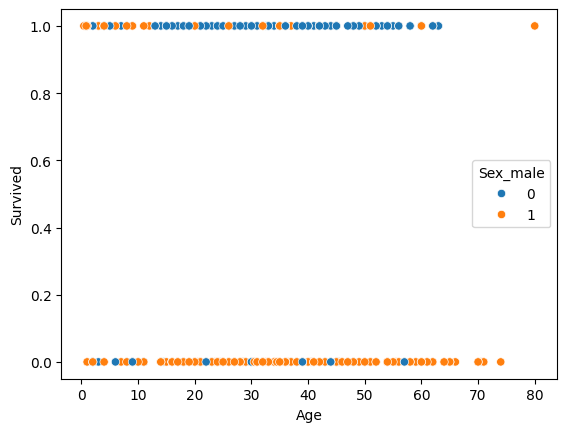

In [180]:
sns.scatterplot(filtered_data,x='Age',y='Survived', hue='Sex_male')

In [170]:
import matplotlib.pyplot as plt

去掉了没有年龄这个参数的数据

In [30]:
filtered_data.sample(5)

,PassengerId,Survived,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,Sex_male
654,655,0,18.0,0,0,6.7500,1,0,0,1,0
621,622,1,42.0,1,0,52.5542,0,1,0,0,1
280,281,0,65.0,0,0,7.7500,1,0,0,1,1
603,604,0,44.0,0,0,8.0500,0,1,0,1,1
228,229,0,18.0,0,0,13.0000,0,1,1,0,1


In [31]:
filtered_data.info(5)

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Age          714 non-null    float64
 3   SibSp        714 non-null    int64  
 4   Parch        714 non-null    int64  
 5   Fare         714 non-null    float64
 6   Embarked_Q   714 non-null    int32  
 7   Embarked_S   714 non-null    int32  
 8   Pclass_2     714 non-null    int32  
 9   Pclass_3     714 non-null    int32  
 10  Sex_male     714 non-null    int32  
dtypes: float64(2), int32(5), int64(4)
memory usage: 53.0 KB


In [33]:
y=filtered_data['Survived']

In [63]:
X=filtered_data.drop('Survived', axis=1)

In [64]:
X=sm.add_constant(X)

In [65]:
sm.Logit(y,X)

In [66]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      707
Method:                           MLE   Df Model:                            6
Date:                Mon, 19 Aug 2024   Pseudo R-squ.:                  0.3406
Time:                        15:54:14   Log-Likelihood:                -318.01
converged:                       True   LL-Null:                       -482.26
Covariance Type:            nonrobust   LLR p-value:                 6.378e-68
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1716      0.502      8.306      0.000       3.187       5.156
Age           -0.0441      0.008     -5.343      0.000      -0.060      -0.028
SibSp         -0.3934      0.123     -3.193      0.001      -0.635      -0.152
Fare           0.0018      0.002      0.713      0.476      -0.003       0.007
Pclass_2      -1.3083      0.320     -4.092      0.000      -1.935      -0.682
Pclass_3      -2.5258      0.335     -7.549      0.000      -3.182      -1.870
Sex_male      -2.6161      0.215    -12.145      0.000      -3.038      -2.194
==============================================================================
"""

从这里我们看到，PassengerId，Parch，Embarked_Q，Embarked_S这几个变量似乎都对总结果没什么影响

In [67]:
X=X.drop(["PassengerId", "Parch", "Fare", "Embarked_Q", "Embarked_S"], axis=1)

In [68]:
X=sm.add_constant(X)

In [69]:
sm.Logit(y,X)

In [70]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      707
Method:                           MLE   Df Model:                            6
Date:                Mon, 19 Aug 2024   Pseudo R-squ.:                  0.3406
Time:                        15:54:21   Log-Likelihood:                -318.01
converged:                       True   LL-Null:                       -482.26
Covariance Type:            nonrobust   LLR p-value:                 6.378e-68
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1716      0.502      8.306      0.000       3.187       5.156
Age           -0.0441      0.008     -5.343      0.000      -0.060      -0.028
SibSp         -0.3934      0.123     -3.193      0.001      -0.635      -0.152
Fare           0.0018      0.002      0.713      0.476      -0.003       0.007
Pclass_2      -1.3083      0.320     -4.092      0.000      -1.935      -0.682
Pclass_3      -2.5258      0.335     -7.549      0.000      -3.182      -1.870
Sex_male      -2.6161      0.215    -12.145      0.000      -3.038      -2.194
==============================================================================
"""

In [71]:
X

,const,Age,SibSp,Pclass_2,Pclass_3,Sex_male
0,1.0,22.0,1,0,1,1
1,1.0,38.0,1,0,0,0
2,1.0,26.0,0,0,1,0
3,1.0,35.0,1,0,0,0
4,1.0,35.0,0,0,1,1
...,...,...,...,...,...,...
885,1.0,39.0,0,0,1,0
886,1.0,27.0,0,1,0,1
887,1.0,19.0,0,0,0,0
889,1.0,26.0,0,0,0,1


In [76]:
sm.Logit(y,X)

In [77]:
result=sm.Logit(y,X).fit()

Optimization terminated successfully.
         Current function value: 0.445774
         Iterations 6


In [78]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      708
Method:                           MLE   Df Model:                            5
Date:                Mon, 19 Aug 2024   Pseudo R-squ.:                  0.3400
Time:                        15:57:02   Log-Likelihood:                -318.28
converged:                       True   LL-Null:                       -482.26
Covariance Type:            nonrobust   LLR p-value:                 9.745e-69
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3342      0.451      9.617      0.000       3.451       5.218
Age           -0.0448      0.008     -5.442      0.000      -0.061      -0.029
SibSp         -0.3802      0.122     -3.129      0.002      -0.618      -0.142
Pclass_2      -1.4144      0.285     -4.967      0.000      -1.972      -0.856
Pclass_3      -2.6526      0.286     -9.280      0.000      -3.213      -2.092
Sex_male      -2.6277      0.215    -12.235      0.000      -3.049      -2.207
==============================================================================
"""

# 现在我们要读取打开要尝试的数据了

In [79]:
test_data=pd.read_csv("titanic_test.csv")

In [80]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## 现在我们去掉一些多余的数据

In [117]:
filtered_test_data=test_data.drop(["Name","Cabin","Fare","Embarked","PassengerId","Parch","Ticket"],axis=1)

In [133]:
filtered_test_data_1=filtered_test_data[filtered_test_data["Age"].notna()]

In [135]:
filtered_test_data_1.sample(5)

,Pclass,Sex,Age,SibSp
184,1,female,27.0,1
242,1,male,45.0,1
261,3,male,21.0,0
161,3,male,7.0,1
232,3,male,21.0,1


In [137]:
filtered_test_data_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 332 entries, 0 to 415
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  332 non-null    int64  
 1   Sex     332 non-null    object 
 2   Age     332 non-null    float64
 3   SibSp   332 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 13.0+ KB


In [139]:
filtered_test_data_1.loc[:, 'Sex']=pd.Categorical(filtered_test_data_1['Sex'], categories=['female','male'])

In [140]:
filtered_test_data_1.loc[:, 'Pclass']=pd.Categorical(filtered_test_data_1['Pclass'], categories=[1,2,3])

In [142]:
ready_data=pd.get_dummies(filtered_test_data_1,columns=["Pclass","Sex"],dtype=int,drop_first=True)

In [147]:
ready_data

,Age,SibSp,Pclass_2,Pclass_3,Sex_male
0,34.5,0,0,1,0
1,47.0,1,0,1,0
2,62.0,0,1,0,0
3,27.0,0,0,1,0
4,22.0,1,0,1,0
...,...,...,...,...,...
409,3.0,1,0,1,0
411,37.0,1,0,0,0
412,28.0,0,0,1,0
414,39.0,0,0,0,0


In [148]:
ready_data=sm.add_constant(ready_data)

In [149]:
ready_data

,const,Age,SibSp,Pclass_2,Pclass_3,Sex_male
0,1.0,34.5,0,0,1,0
1,1.0,47.0,1,0,1,0
2,1.0,62.0,0,1,0,0
3,1.0,27.0,0,0,1,0
4,1.0,22.0,1,0,1,0
...,...,...,...,...,...,...
409,1.0,3.0,1,0,1,0
411,1.0,37.0,1,0,0,0
412,1.0,28.0,0,0,1,0
414,1.0,39.0,0,0,0,0


In [152]:
predicted_data=result.predict(ready_data)

In [155]:
predicted_data.describe()

count    332.000000
mean       0.738677
std        0.166373
min        0.118266
25%        0.632657
50%        0.759613
75%        0.877224
max        0.983137
dtype: float64

In [156]:
import seaborn as sns

<Axes: ylabel='Count'>

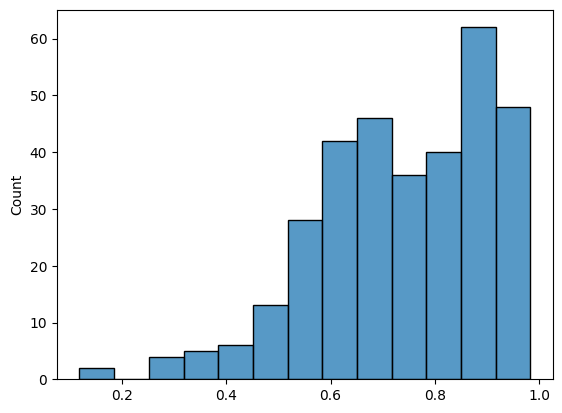

In [159]:
sns.histplot(predicted_data)

<Axes: ylabel='Density'>

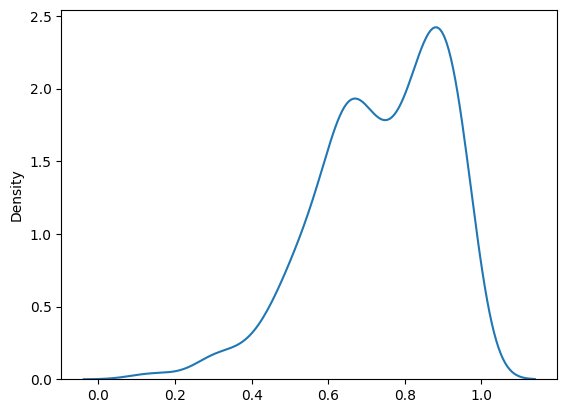

In [162]:
sns.kdeplot(predicted_data)

In [166]:
(predicted_data>0.7).describe()

count      332
unique       2
top       True
freq       200
dtype: object

## 在有年龄信息的300多人中 预计有200人可以活下来

##  在这里，我去掉了没有年龄数据的信息，但是事实上，可以用年龄的平均去填充